In [26]:
import tensorflow as ts 
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [27]:
(X_train , y_train ), (X_test , y_test ) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [28]:
X_test.shape

(10000, 32, 32, 3)

In [29]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [30]:
y_train.shape


(50000, 1)

In [31]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [32]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [33]:
classes = ["airplane","automobile", " bird" , "cat " ,"deer" , "dog", "frog " ,"horse","ship", "truck" ]

In [34]:
classes[0]

'airplane'

In [35]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[index])

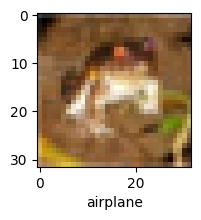

In [36]:
plot_sample(X_train,y_train,0)

In [37]:
X_train = X_train/255
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

ANN

In [41]:
model = models.Sequential([    
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train , y_train , epochs=5)

c:\Users\mauch\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.3002 - loss: 1.9398
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4180 - loss: 1.6457
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4484 - loss: 1.5617
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4725 - loss: 1.4982
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4869 - loss: 1.4480


In [42]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4478 - loss: 189.6232


[192.1094207763672, 0.4375999867916107]

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


y_pred = model.predict(X_test)
Y_pred_class = [np.argmax(ele) for ele in y_pred]  

print('Classification Report \n', classification_report(y_test, Y_pred_class))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Classification Report 
               precision    recall  f1-score   support

           0       0.22      0.87      0.35      1000
           1       0.31      0.45      0.36      1000
           2       0.17      0.56      0.26      1000
           3       0.18      0.21      0.19      1000
           4       0.20      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.67      0.00      0.01      1000
           8       0.25      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.21     10000
   macro avg       0.20      0.21      0.12     10000
weighted avg       0.20      0.21      0.12     10000



c:\Users\mauch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mauch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mauch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

CNN

In [56]:
cnn = models.Sequential([   
    # cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax'),
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train ,y_train,epochs=10 )

c:\Users\mauch\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3776 - loss: 1.7188
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5841 - loss: 1.1742
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6421 - loss: 1.0304
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6623 - loss: 0.9669
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6902 - loss: 0.8901
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7038 - loss: 0.8470
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7216 - loss: 0.8060
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7347 - loss: 0.7604
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7450 - loss: 0.7288
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7575 - loss: 0.6924


In [57]:
cnn.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4357 - loss: 257.3936


[254.50987243652344, 0.43470001220703125]

In [63]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

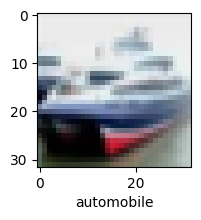

In [60]:
plot_sample(X_test,y_test,1)

In [68]:
pre = cnn.predict(X_test)
pre

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [70]:
y_classes = [np.argmax(ele) for ele in pre]
y_classes[:5]

[3, 8, 8, 8, 8]

In [71]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

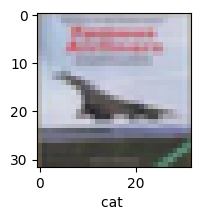

In [73]:
plot_sample(X_test,y_test,3)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


y_pred = cnn.predict(X_test)
Y_pred_class = [np.argmax(ele) for ele in y_pred] 

print('Classification Report \n', classification_report(y_test, Y_pred_class))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report 
               precision    recall  f1-score   support

           0       0.29      0.81      0.43      1000
           1       0.50      0.62      0.55      1000
           2       0.56      0.16      0.25      1000
           3       0.38      0.17      0.23      1000
           4       0.73      0.09      0.15      1000
           5       0.46      0.45      0.45      1000
           6       0.76      0.20      0.32      1000
           7       0.58      0.58      0.58      1000
           8       0.37      0.73      0.49      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.43     10000
   macro avg       0.52      0.43      0.40     10000
weighted avg       0.52      0.43      0.40     10000

